# DATA201 - DATA WRANGLING

**LECTURERS:**      Thomas Li, Taylor Winter

# Group Project: Basketball Game (NBA)

**TEAM MEMBERS:**

Albert Zhong - 76329912 (yzh426)

Bang Vu - 81284510 (bvu16) 

Richard McNulty - 16921640 (rmc228)

Ryan Robinson - 12396361 (rro96)

In [ ]:
# Link to our GitHub repository: https://github.com/Albertooo666/Albert

In [1]:
# First, we need to import some packages

library(rvest) # popular R package used for web scraping
library(tidyverse) # useful for data manipulation, visualization, and analysis
library(magrittr) # for better handling of the pipe operator
library(purrr) # useful for iterating over elements, mapping functions, and working with lists and data frames
library(glue) # useful for string interpolation and templating
library(stringr) # useful for working with strings (manipulation, pattern matching, ...)
library(remotes) # useful for installing packages from a remote source (GitHub, GitLab, ...) 
library(polite) # the "polite" version of rvest, useful for working with web APIs
library(xml2) # useful for working with XML and HTML documents

── Attaching core tidyverse packages ─────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [3]:
# Assigning the webpage content to "url" varible
url <- "https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_career_scoring_leaders"
# Reading and parsing the content of the webpage
nba <- read_html(url)

In [4]:
# Checking the data type of 'page' and getting a summary info of "nba"
nba %>% typeof()
nba %>% glimpse()
nba %>% html_structure()

# Sorry for the lengthy output below

[1] "list"

List of 2
 $ node:<externalptr> 
 $ doc :<externalptr> 
 - attr(*, "class")= chr [1:2] "xml_document" "xml_node"
<html.client-nojs.vector-feature-language-in-header-enabled.vector-feature-language-in-main-page-header-disabled.vector-feature-sticky-header-disabled.vector-feature-page-tools-pinned-disabled.vector-feature-toc-pinned-clientpref-1.vector-feature-main-menu-pinned-disabled.vector-feature-limited-width-clientpref-1.vector-feature-limited-width-content-enabled.vector-feature-zebra-design-disabled.vector-feature-custom-font-size-clientpref-disabled.vector-feature-client-preferences-disabled.vector-feature-typography-survey-disabled.vector-toc-available [lang, dir]>
  <head>
    <meta [charset]>
    <title>
      {text}
    <script>
      {cdata}
    <script>
      {cdata}
    <link [rel, href]>
    <script [async, src]>
    <meta [name, content]>
    <link [rel, href]>
    <link [rel, href]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <me

In [5]:
# Writing .title, with the dot because we want all results with that tag.
# Trying removing it and see what happens
nba %>%
  html_nodes(xpath = '//*[@class="vcard"]/span[@class="fn"]/a') # selecting elements of "vcard" class

{xml_nodeset (50)}
 [1] <a href="/wiki/LeBron_James" title="LeBron James">LeBron James</a>
 [2] <a href="/wiki/Kareem_Abdul-Jabbar" title="Kareem Abdul-Jabbar">Kareem A ...
 [3] <a href="/wiki/Karl_Malone" title="Karl Malone">Karl Malone</a>
 [4] <a href="/wiki/Kobe_Bryant" title="Kobe Bryant">Kobe Bryant</a>
 [5] <a href="/wiki/Michael_Jordan" title="Michael Jordan">Michael Jordan</a>
 [6] <a href="/wiki/Dirk_Nowitzki" title="Dirk Nowitzki">Dirk Nowitzki</a>
 [7] <a href="/wiki/Wilt_Chamberlain" title="Wilt Chamberlain">Wilt Chamberla ...
 [8] <a href="/wiki/Shaquille_O%27Neal" title="Shaquille O'Neal">Shaquille O' ...
 [9] <a href="/wiki/Carmelo_Anthony" title="Carmelo Anthony">Carmelo Anthony</a>
[10] <a href="/wiki/Moses_Malone" title="Moses Malone">Moses Malone</a>
[11] <a href="/wiki/Elvin_Hayes" title="Elvin Hayes">Elvin Hayes</a>
[12] <a href="/wiki/Hakeem_Olajuwon" title="Hakeem Olajuwon">Hakeem Olajuwon</a>
[13] <a href="/wiki/Kevin_Durant" title="Kevin Durant">Kevin Durant</

In [6]:
# Extracting names from the webpage
player_name <- nba%>%
  html_nodes(xpath = '//*[@class="vcard"]/span[@class="fn"]/a') %>% # Selecting the HTML elements with class "vcard"
  html_text()  # Extracting the text content
player_name

[1] "LeBron James"        "Kareem Abdul-Jabbar" "Karl Malone"        
 [4] "Kobe Bryant"         "Michael Jordan"      "Dirk Nowitzki"      
 [7] "Wilt Chamberlain"    "Shaquille O'Neal"    "Carmelo Anthony"    
[10] "Moses Malone"        "Elvin Hayes"         "Hakeem Olajuwon"    
[13] "Kevin Durant"        "Oscar Robertson"     "Dominique Wilkins"  
[16] "Tim Duncan"          "Paul Pierce"         "John Havlicek"      
[19] "Kevin Garnett"       "Vince Carter"        "Alex English"       
[22] "Reggie Miller"       "Jerry West"          "Patrick Ewing"      
[25] "James Harden"        "Ray Allen"           "Russell Westbrook"  
[28] "Allen Iverson"       "Charles Barkley"     "Robert Parish"      
[31] "Adrian Dantley"      "Dwyane Wade"         "Elgin Baylor"       
[34] "Clyde Drexler"       "Gary Payton"         "Larry Bird"         
[37] "Chris Paul"          "Stephen Curry"       "DeMar DeRozan"      
[40] "Hal Greer"           "Walt Bellamy"        "Pau Gasol"          
[43] "Bob Pettit"          "David Robinson"      "George Gervin"      
[46] "LaMarcus Aldridge"   "Mitch Richmond"      "Joe Johnson"        
[49] "Tom Chambers"        "Antawn Jamison"

In [7]:
# Building the Title variable using the code we used above
SLS_df <- tibble(Association = "NBA",
                 Names = player_name) 
SLS_df

Association Names              
1  NBA         LeBron James       
2  NBA         Kareem Abdul-Jabbar
3  NBA         Karl Malone        
4  NBA         Kobe Bryant        
5  NBA         Michael Jordan     
6  NBA         Dirk Nowitzki      
7  NBA         Wilt Chamberlain   
8  NBA         Shaquille O'Neal   
9  NBA         Carmelo Anthony    
10 NBA         Moses Malone       
11 NBA         Elvin Hayes        
12 NBA         Hakeem Olajuwon    
13 NBA         Kevin Durant       
14 NBA         Oscar Robertson    
15 NBA         Dominique Wilkins  
16 NBA         Tim Duncan         
17 NBA         Paul Pierce        
18 NBA         John Havlicek      
19 NBA         Kevin Garnett      
20 NBA         Vince Carter       
21 NBA         Alex English       
22 NBA         Reggie Miller      
23 NBA         Jerry West         
24 NBA         Patrick Ewing      
25 NBA         James Harden       
26 NBA         Ray Allen          
27 NBA         Russell Westbrook  
28 NBA         Allen Iverson      
29 NBA         Charles Barkley    
30 NBA         Robert Parish      
31 NBA         Adrian Dantley     
32 NBA         Dwyane Wade        
33 NBA         Elgin Baylor       
34 NBA         Clyde Drexler      
35 NBA         Gary Payton        
36 NBA         Larry Bird         
37 NBA         Chris Paul         
38 NBA         Stephen Curry      
39 NBA         DeMar DeRozan      
40 NBA         Hal Greer          
41 NBA         Walt Bellamy       
42 NBA         Pau Gasol          
43 NBA         Bob Pettit         
44 NBA         David Robinson     
45 NBA         George Gervin      
46 NBA         LaMarcus Aldridge  
47 NBA         Mitch Richmond     
48 NBA         Joe Johnson        
49 NBA         Tom Chambers       
50 NBA         Antawn Jamison

In [8]:
# Extracting the attributes of the selected HTML elements, 
# including the 'href' attribute which contains the URLs
nba %>%
  html_nodes(xpath = '//*[@class="vcard"]/span[@class="fn"]/a') %>%
  html_attrs() %>%
  glimpse()

List of 50
 $ : Named chr [1:2] "/wiki/LeBron_James" "LeBron James"
  ..- attr(*, "names")= chr [1:2] "href" "title"
 $ : Named chr [1:2] "/wiki/Kareem_Abdul-Jabbar" "Kareem Abdul-Jabbar"
  ..- attr(*, "names")= chr [1:2] "href" "title"
 $ : Named chr [1:2] "/wiki/Karl_Malone" "Karl Malone"
  ..- attr(*, "names")= chr [1:2] "href" "title"
 $ : Named chr [1:2] "/wiki/Kobe_Bryant" "Kobe Bryant"
  ..- attr(*, "names")= chr [1:2] "href" "title"
 $ : Named chr [1:2] "/wiki/Michael_Jordan" "Michael Jordan"
  ..- attr(*, "names")= chr [1:2] "href" "title"
 $ : Named chr [1:2] "/wiki/Dirk_Nowitzki" "Dirk Nowitzki"
  ..- attr(*, "names")= chr [1:2] "href" "title"
 $ : Named chr [1:2] "/wiki/Wilt_Chamberlain" "Wilt Chamberlain"
  ..- attr(*, "names")= chr [1:2] "href" "title"
 $ : Named chr [1:2] "/wiki/Shaquille_O%27Neal" "Shaquille O'Neal"
  ..- attr(*, "names")= chr [1:2] "href" "title"
 $ : Named chr [1:2] "/wiki/Carmelo_Anthony" "Carmelo Anthony"
  ..- attr(*, "names")= chr [1:2] "href" "ti

In [9]:
# Extracting all anchor elements with class "vcard", 
nba %>%
  html_nodes(xpath = '//*[@class="vcard"]/span[@class="fn"]/a') %>%
  html_attrs() %>%
  map_chr("href") %>%
  paste0("https://en.wikipedia.org/", .)

[1] "https://en.wikipedia.org//wiki/LeBron_James"             
 [2] "https://en.wikipedia.org//wiki/Kareem_Abdul-Jabbar"      
 [3] "https://en.wikipedia.org//wiki/Karl_Malone"              
 [4] "https://en.wikipedia.org//wiki/Kobe_Bryant"              
 [5] "https://en.wikipedia.org//wiki/Michael_Jordan"           
 [6] "https://en.wikipedia.org//wiki/Dirk_Nowitzki"            
 [7] "https://en.wikipedia.org//wiki/Wilt_Chamberlain"         
 [8] "https://en.wikipedia.org//wiki/Shaquille_O%27Neal"       
 [9] "https://en.wikipedia.org//wiki/Carmelo_Anthony"          
[10] "https://en.wikipedia.org//wiki/Moses_Malone"             
[11] "https://en.wikipedia.org//wiki/Elvin_Hayes"              
[12] "https://en.wikipedia.org//wiki/Hakeem_Olajuwon"          
[13] "https://en.wikipedia.org//wiki/Kevin_Durant"             
[14] "https://en.wikipedia.org//wiki/Oscar_Robertson"          
[15] "https://en.wikipedia.org//wiki/Dominique_Wilkins"        
[16] "https://en.wikipedia.org//wiki/Tim_Duncan"               
[17] "https://en.wikipedia.org//wiki/Paul_Pierce"              
[18] "https://en.wikipedia.org//wiki/John_Havlicek"            
[19] "https://en.wikipedia.org//wiki/Kevin_Garnett"            
[20] "https://en.wikipedia.org//wiki/Vince_Carter"             
[21] "https://en.wikipedia.org//wiki/Alex_English"             
[22] "https://en.wikipedia.org//wiki/Reggie_Miller"            
[23] "https://en.wikipedia.org//wiki/Jerry_West"               
[24] "https://en.wikipedia.org//wiki/Patrick_Ewing"            
[25] "https://en.wikipedia.org//wiki/James_Harden"             
[26] "https://en.wikipedia.org//wiki/Ray_Allen"                
[27] "https://en.wikipedia.org//wiki/Russell_Westbrook"        
[28] "https://en.wikipedia.org//wiki/Allen_Iverson"            
[29] "https://en.wikipedia.org//wiki/Charles_Barkley"          
[30] "https://en.wikipedia.org//wiki/Robert_Parish"            
[31] "https://en.wikipedia.org//wiki/Adrian_Dantley"           
[32] "https://en.wikipedia.org//wiki/Dwyane_Wade"              
[33] "https://en.wikipedia.org//wiki/Elgin_Baylor"             
[34] "https://en.wikipedia.org//wiki/Clyde_Drexler"            
[35] "https://en.wikipedia.org//wiki/Gary_Payton"              
[36] "https://en.wikipedia.org//wiki/Larry_Bird"               
[37] "https://en.wikipedia.org//wiki/Chris_Paul"               
[38] "https://en.wikipedia.org//wiki/Stephen_Curry"            
[39] "https://en.wikipedia.org//wiki/DeMar_DeRozan"            
[40] "https://en.wikipedia.org//wiki/Hal_Greer"                
[41] "https://en.wikipedia.org//wiki/Walt_Bellamy"             
[42] "https://en.wikipedia.org//wiki/Pau_Gasol"                
[43] "https://en.wikipedia.org//wiki/Bob_Pettit"               
[44] "https://en.wikipedia.org//wiki/David_Robinson"           
[45] "https://en.wikipedia.org//wiki/George_Gervin"            
[46] "https://en.wikipedia.org//wiki/LaMarcus_Aldridge"        
[47] "https://en.wikipedia.org//wiki/Mitch_Richmond"           
[48] "https://en.wikipedia.org//wiki/Joe_Johnson_(basketball)" 
[49] "https://en.wikipedia.org//wiki/Tom_Chambers_(basketball)"
[50] "https://en.wikipedia.org//wiki/Antawn_Jamison"

In [10]:
# Extracting the total points scored by NBA players,
# then selecting the top 50 points
total_points <- nba %>%
  html_nodes("td:nth-child(5)") %>%
  html_text() %>%
  str_replace_all("\n", "") 
top_50_points <- head(total_points, 50)
top_50_points

[1] "38,673" "38,387" "36,928" "33,643" "32,292" "31,560" "31,419" "28,596"
 [9] "28,289" "27,409" "27,313" "26,946" "26,910" "26,710" "26,668" "26,496"
[17] "26,397" "26,395" "26,071" "25,728" "25,613" "25,279" "25,192" "24,815"
[25] "24,693" "24,505" "24,457" "24,368" "23,757" "23,334" "23,177" "23,165"
[33] "23,149" "22,195" "21,813" "21,791" "21,769" "21,739" "21,685" "21,586"
[41] "20,941" "20,894" "20,880" "20,790" "20,708" "20,558" "20,497" "20,407"
[49] "20,049" "20,042"

In [11]:
# Updating the 'SLS_df' dataframe by adding two new columns: 'Link' and 'Points'
SLS_df %<>% 
  # Extract the 'href' attribute from the anchor elements with class '.article_movie_title'
  mutate(Link = nba %>% html_nodes(xpath = '//*[@class="vcard"]/span[@class="fn"]/a') %>% html_attr("href") ,Points = top_50_points)

SLS_df

Association Names               Link                            Points
1  NBA         LeBron James        /wiki/LeBron_James              38,673
2  NBA         Kareem Abdul-Jabbar /wiki/Kareem_Abdul-Jabbar       38,387
3  NBA         Karl Malone         /wiki/Karl_Malone               36,928
4  NBA         Kobe Bryant         /wiki/Kobe_Bryant               33,643
5  NBA         Michael Jordan      /wiki/Michael_Jordan            32,292
6  NBA         Dirk Nowitzki       /wiki/Dirk_Nowitzki             31,560
7  NBA         Wilt Chamberlain    /wiki/Wilt_Chamberlain          31,419
8  NBA         Shaquille O'Neal    /wiki/Shaquille_O%27Neal        28,596
9  NBA         Carmelo Anthony     /wiki/Carmelo_Anthony           28,289
10 NBA         Moses Malone        /wiki/Moses_Malone              27,409
11 NBA         Elvin Hayes         /wiki/Elvin_Hayes               27,313
12 NBA         Hakeem Olajuwon     /wiki/Hakeem_Olajuwon           26,946
13 NBA         Kevin Durant        /wiki/Kevin_Durant              26,910
14 NBA         Oscar Robertson     /wiki/Oscar_Robertson           26,710
15 NBA         Dominique Wilkins   /wiki/Dominique_Wilkins         26,668
16 NBA         Tim Duncan          /wiki/Tim_Duncan                26,496
17 NBA         Paul Pierce         /wiki/Paul_Pierce               26,397
18 NBA         John Havlicek       /wiki/John_Havlicek             26,395
19 NBA         Kevin Garnett       /wiki/Kevin_Garnett             26,071
20 NBA         Vince Carter        /wiki/Vince_Carter              25,728
21 NBA         Alex English        /wiki/Alex_English              25,613
22 NBA         Reggie Miller       /wiki/Reggie_Miller             25,279
23 NBA         Jerry West          /wiki/Jerry_West                25,192
24 NBA         Patrick Ewing       /wiki/Patrick_Ewing             24,815
25 NBA         James Harden        /wiki/James_Harden              24,693
26 NBA         Ray Allen           /wiki/Ray_Allen                 24,505
27 NBA         Russell Westbrook   /wiki/Russell_Westbrook         24,457
28 NBA         Allen Iverson       /wiki/Allen_Iverson             24,368
29 NBA         Charles Barkley     /wiki/Charles_Barkley           23,757
30 NBA         Robert Parish       /wiki/Robert_Parish             23,334
31 NBA         Adrian Dantley      /wiki/Adrian_Dantley            23,177
32 NBA         Dwyane Wade         /wiki/Dwyane_Wade               23,165
33 NBA         Elgin Baylor        /wiki/Elgin_Baylor              23,149
34 NBA         Clyde Drexler       /wiki/Clyde_Drexler             22,195
35 NBA         Gary Payton         /wiki/Gary_Payton               21,813
36 NBA         Larry Bird          /wiki/Larry_Bird                21,791
37 NBA         Chris Paul          /wiki/Chris_Paul                21,769
38 NBA         Stephen Curry       /wiki/Stephen_Curry             21,739
39 NBA         DeMar DeRozan       /wiki/DeMar_DeRozan             21,685
40 NBA         Hal Greer           /wiki/Hal_Greer                 21,586
41 NBA         Walt Bellamy        /wiki/Walt_Bellamy              20,941
42 NBA         Pau Gasol           /wiki/Pau_Gasol                 20,894
43 NBA         Bob Pettit          /wiki/Bob_Pettit                20,880
44 NBA         David Robinson      /wiki/David_Robinson            20,790
45 NBA         George Gervin       /wiki/George_Gervin             20,708
46 NBA         LaMarcus Aldridge   /wiki/LaMarcus_Aldridge         20,558
47 NBA         Mitch Richmond      /wiki/Mitch_Richmond            20,497
48 NBA         Joe Johnson         /wiki/Joe_Johnson_(basketball)  20,407
49 NBA         Tom Chambers        /wiki/Tom_Chambers_(basketball) 20,049
50 NBA         Antawn Jamison      /wiki/Antawn_Jamison            20,042

In [12]:
# Using FOR loop to add each link in LINK column with "https://en.wikipedia.org/""
for (i in 1:50)
{
  full_link <- paste0("https://en.wikipedia.org/", SLS_df[i,3])
  SLS_df[i,3] <- full_link
}

In [13]:
# Creating a variable 'url_link' using the first value from the 'Link' column of 'SLS_df'
url_link<- glue(SLS_df$Link[1])
url_link

https://en.wikipedia.org//wiki/LeBron_James

In [14]:
# Fetching the release date of the movie from the webpage corresponding to 'url_link'
# Extracting info about the player's position
position <- url_link %>%
  read_html() %>%
  html_node(".infobox-data.role") %>%
  html_text()
position

[1] "Small forward / power forward"

In [15]:
# Extracting information about the NBA player's team
team <- url_link %>%
  read_html() %>%
  html_node("th.infobox-header") %>%
  html_text()
team

[1] "No. 23 – Los Angeles Lakers"

In [16]:
# Extracting the table in the webpage as a dataframe
stat_table <- url_link %>%
  read_html() %>%
  html_element("table.wikitable") %>%
  html_table()

stat_table

Year          Team          GP    GS    MPG   FG%   3P%   FT%   RPG APG  
1  2003–04       Cleveland     79    79    39.5  0.417 0.290 0.754 5.5 5.9  
2  2004–05       Cleveland     80    80    42.4* 0.472 0.351 0.750 7.4 7.2  
3  2005–06       Cleveland     79    79    42.5  0.480 0.335 0.738 7.0 6.6  
4  2006–07       Cleveland     78    78    40.9  0.476 0.319 0.698 6.7 6.0  
5  2007–08       Cleveland     75    74    40.4  0.484 0.315 0.712 7.9 7.2  
6  2008–09       Cleveland     81    81    37.7  0.489 0.344 0.780 7.6 7.2  
7  2009–10       Cleveland     76    76    39.0  0.503 0.333 0.767 7.3 8.6  
8  2010–11       Miami         79    79    38.8  0.510 0.330 0.759 7.5 7.0  
9  2011–12†      Miami         62    62    37.5  0.531 0.362 0.771 7.9 6.2  
10 2012–13†      Miami         76    76    37.9  0.565 0.406 0.753 8.0 7.3  
11 2013–14       Miami         77    77    37.7  0.567 0.379 0.750 6.9 6.4  
12 2014–15       Cleveland     69    69    36.1  0.488 0.354 0.710 6.0 7.4  
13 2015–16†      Cleveland     76    76    35.6  0.520 0.309 0.731 7.4 6.8  
14 2016–17       Cleveland     74    74    37.8* 0.548 0.363 0.674 8.6 8.7  
15 2017–18       Cleveland     82*   82*   36.9* 0.542 0.367 0.731 8.6 9.1  
16 2018–19       L.A. Lakers   55    55    35.2  0.510 0.339 0.665 8.5 8.3  
17 2019–20†      L.A. Lakers   67    67    34.6  0.493 0.348 0.693 7.8 10.2*
18 2020–21       L.A. Lakers   45    45    33.4  0.513 0.365 0.698 7.7 7.8  
19 2021–22       L.A. Lakers   56    56    37.2  0.524 0.359 0.756 8.2 6.2  
20 2022–23       L.A. Lakers   55    54    35.5  0.500 0.321 0.768 8.3 6.8  
21 Career[4]     Career[4]     1,421 1,419 38.1  0.505 0.345 0.735 7.5 7.3  
22 All-Star[602] All-Star[602] 19‡   19‡   27.5  0.516 0.304 0.725 5.8 5.8  
   SPG BPG PPG  
1  1.6 0.7 20.9 
2  2.2 0.7 27.2 
3  1.6 0.8 31.4 
4  1.6 0.7 27.3 
5  1.8 1.1 30.0*
6  1.7 1.1 28.4 
7  1.6 1.0 29.7 
8  1.6 0.6 26.7 
9  1.9 0.8 27.1 
10 1.7 0.9 26.8 
11 1.6 0.3 27.1 
12 1.6 0.7 25.3 
13 1.4 0.6 25.3 
14 1.2 0.6 26.4 
15 1.4 0.9 27.5 
16 1.3 0.6 27.4 
17 1.2 0.5 25.3 
18 1.1 0.6 25.0 
19 1.3 1.1 30.3 
20 0.9 0.6 28.9 
21 1.5 0.8 27.2 
22 1.2 0.4 22.4

In [17]:
# Getting the information needed for the "stat_table"
ppg <- stat_table[nrow(stat_table) - 1, ncol(stat_table)] # getting Points Per Game
ppg
gp<- stat_table[nrow(stat_table) - 1,3] # getting Games Played
gp
mp <- stat_table[nrow(stat_table) - 1,5] # getting Minutes Played
mp

head(stat_table)

view(stat_table)

PPG 
1 27.2

GP   
1 1,421

MPG 
1 38.1

Year    Team      GP GS MPG   FG%   3P%   FT%   RPG APG SPG BPG PPG  
1 2003–04 Cleveland 79 79 39.5  0.417 0.290 0.754 5.5 5.9 1.6 0.7 20.9 
2 2004–05 Cleveland 80 80 42.4* 0.472 0.351 0.750 7.4 7.2 2.2 0.7 27.2 
3 2005–06 Cleveland 79 79 42.5  0.480 0.335 0.738 7.0 6.6 1.6 0.8 31.4 
4 2006–07 Cleveland 78 78 40.9  0.476 0.319 0.698 6.7 6.0 1.6 0.7 27.3 
5 2007–08 Cleveland 75 74 40.4  0.484 0.315 0.712 7.9 7.2 1.8 1.1 30.0*
6 2008–09 Cleveland 81 81 37.7  0.489 0.344 0.780 7.6 7.2 1.7 1.1 28.4

In [19]:
# Create 3 empty vectors
ppg_vector <- c()
gp_vector <- c()
mp_vector <- c()

In [20]:
# Looping through the list of NBA players to get the values we need

for(i in 1:50)
{
  url_link <- SLS_df[[i,3]]
  stat_tables <- url_link %>%
    read_html() %>%
    html_nodes("table") %>%
    html_table()
  
  ppg <- NA
  gp <- NA
  mp <- NA
  
  for(j in 1:length(stat_tables)) {
    stat_table <- stat_tables[[j]]
    
    career_row_num <- 0
    
    # Checking if the table contains the required columns and header
    if("PPG" %in% colnames(stat_table) && "GP" %in% colnames(stat_table)) {
      
      for (j in 1:nrow(stat_table)) {
        if (grepl("areer", stat_table[j,1]))
        {
          career_row_num <- j
        }
      }
      
      if(!is.null(row_number) && !career_row_num == 0) {
        PPG_Num <- grep("PPG", colnames(stat_table))[1]
        GP_Num <- grep("GP", colnames(stat_table))[1]
        MP_Num <- grep("MPG", colnames(stat_table))[1]
        if (is.na(MP_Num))
        {
          MP_Num <- grep("MIN", colnames(stat_table))[1]
        }
        
        ppg <- stat_table[career_row_num,PPG_Num]
        gp<- stat_table[career_row_num,GP_Num]
        mp <- stat_table[career_row_num,MP_Num]
        
        break # Breaking the loop if all the values we need are successfully found.
      }
      
    }
  }
  
  # Appending the values to the vectors
  ppg_vector <- c(ppg_vector, ppg)
  gp_vector <- c(gp_vector, gp)
  mp_vector <- c(mp_vector, mp)
}

In [21]:
# Adding the vectors as new columns to the "SLF_df" dataframe
SLS_df$PPG <- ppg_vector
SLS_df$GP <- gp_vector
SLS_df$MP <- mp_vector

view(SLS_df)

In [ ]:
# Looping through the dataframe to remove unwanted characters from the 4 columns: Points, PPG, GP and MP
# "," and "‡" are successfully removed from those columns.
for (i in 1:nrow(SLS_df))
{
  SLS_df$Points[i] <- gsub(pattern = "‡", "" ,SLS_df[[i,4]])
  SLS_df$Points[i] <- gsub(pattern = ",", "" ,SLS_df[[i,4]])
  
  SLS_df$PPG[i] <- gsub(pattern = "‡", "" ,SLS_df[[i,5]])
  SLS_df$PPG[i] <- gsub(pattern = ",", "" ,SLS_df[[i,5]])
  
  SLS_df$GP[i] <- gsub(pattern = "‡", "" ,SLS_df[[i,6]])
  SLS_df$GP[i] <- gsub(pattern = ",", "" ,SLS_df[[i,6]])
  
  SLS_df$MP[i] <- gsub(pattern = "‡", "" ,SLS_df[[i,7]])
  SLS_df$MP[i] <- gsub(pattern = ",", "" ,SLS_df[[i,7]])
}

In [22]:
# Converting values of 4 columns (Points, PPG, GP, MP) into numeric data type.
SLS_df <- SLS_df %>%
  mutate(Points = as.numeric(Points),
         PPG = as.numeric(PPG),
         GP = as.numeric(GP),
         MP = as.numeric(MP))

Warning message:
“There were 40 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Points = as.numeric(Points)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 39 remaining warnings.”


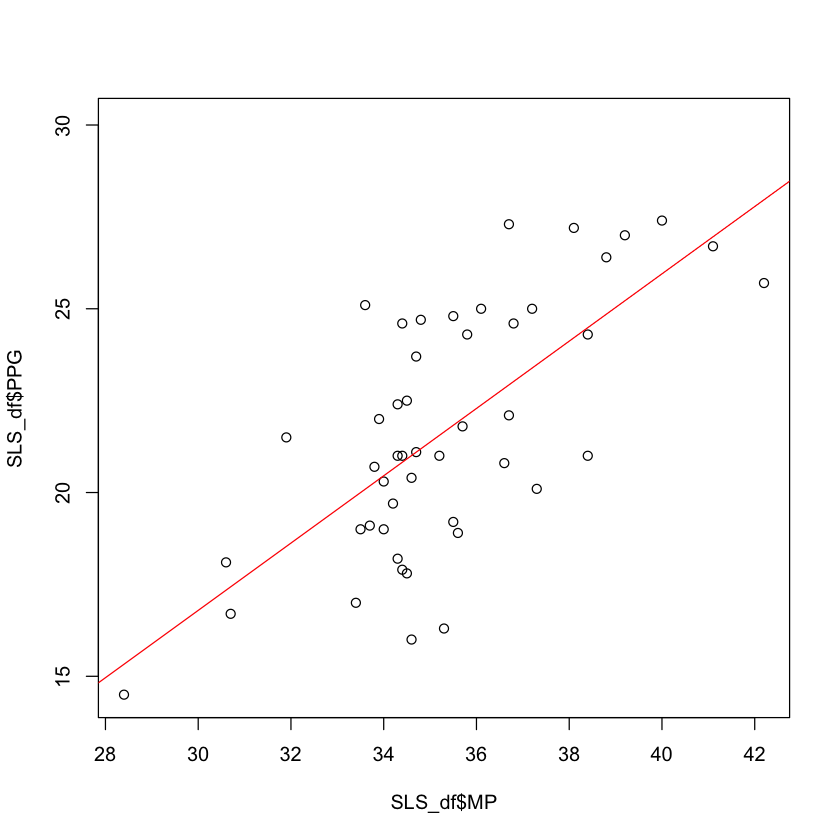

In [23]:
# Now we have got the "clean" data, ready for plotting.

plot(SLS_df$MP, SLS_df$PPG)
abline(lm(PPG~MP, data = SLS_df), col = "red")

In [25]:
# PLOTS

# Plot 1: Relationship between Points per Game is (PPG) and Points scored

# Observation: Top scores tends have played around 1300 to 1600 games, 
# Outliner: One player played over 1600 games but the points he scored was low.

ggplot(data = SLS_df,
       aes(x = GP, y = Points)) +
  geom_point() +
  labs(title = "Points Per Game vs Points Scored", x = "Games Played", y = "Points")

Warning message:
“Removed 50 rows containing missing values (`geom_point()`).”


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


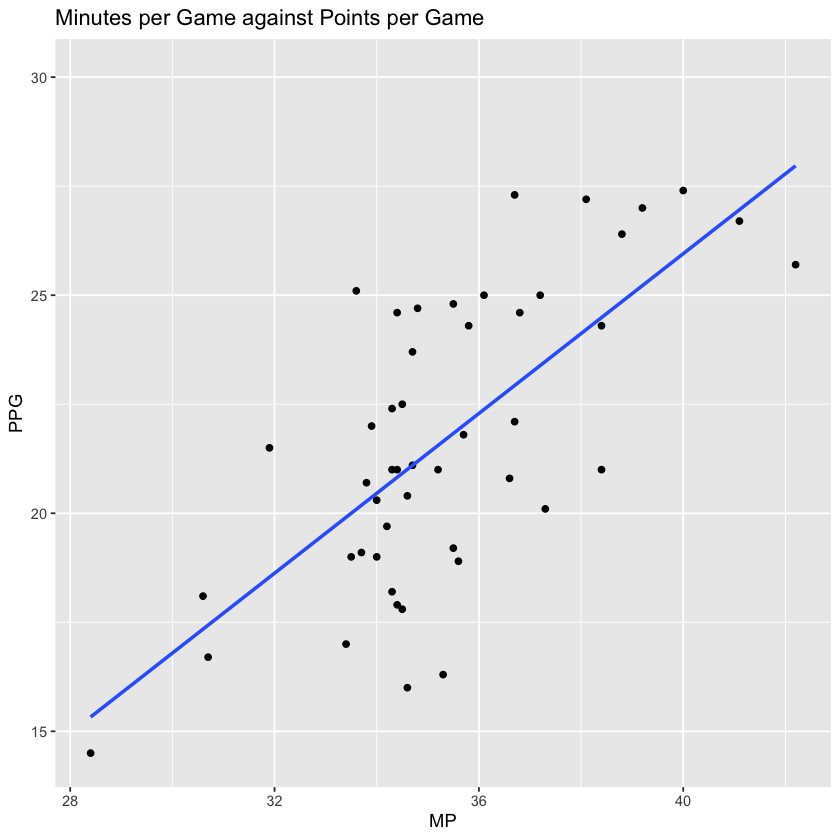

In [26]:
# Plot 2: Relationship between Minutes per Game (MPG) and Points per Game (PPG)

# Fitting a line with geom_smooth, make it straight with method = "lm"
# Observation: Positive relationship. 
    # Players who play more minutes tend to score more points. 

ggplot(data = SLS_df,
       aes(MP, PPG)) + 
  geom_point()+
  geom_smooth(method='lm', se = F)+
  labs(title = "Minutes per Game against Points per Game",
       xlab = "MPG")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 37 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 37 rows containing missing values (`geom_point()`).”


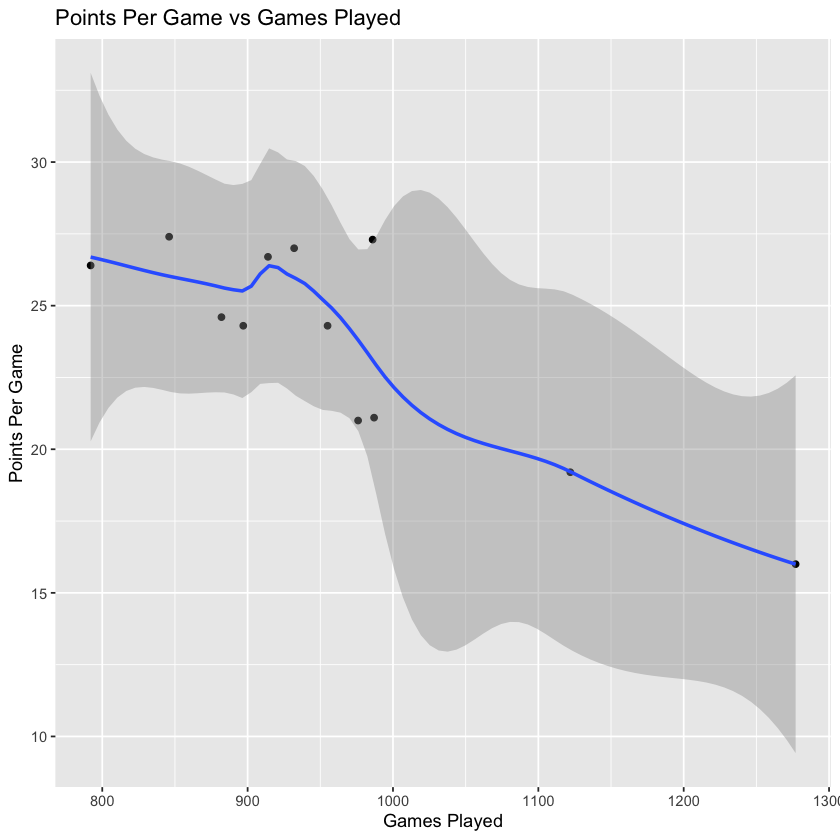

In [27]:
# Plot 3: Relationship between Points per Game and Games Played

# Observation: Negative relationship. 
    # As a player's career continues, they tend to score less points.

ggplot(data = SLS_df[-50,],
       aes(x = GP, y = PPG)) +
  geom_point() +
  geom_smooth()+
  labs(title = "Points Per Game vs Games Played", x = "Games Played", y = "Points Per Game")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 50 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 50 rows containing missing values (`geom_point()`).”


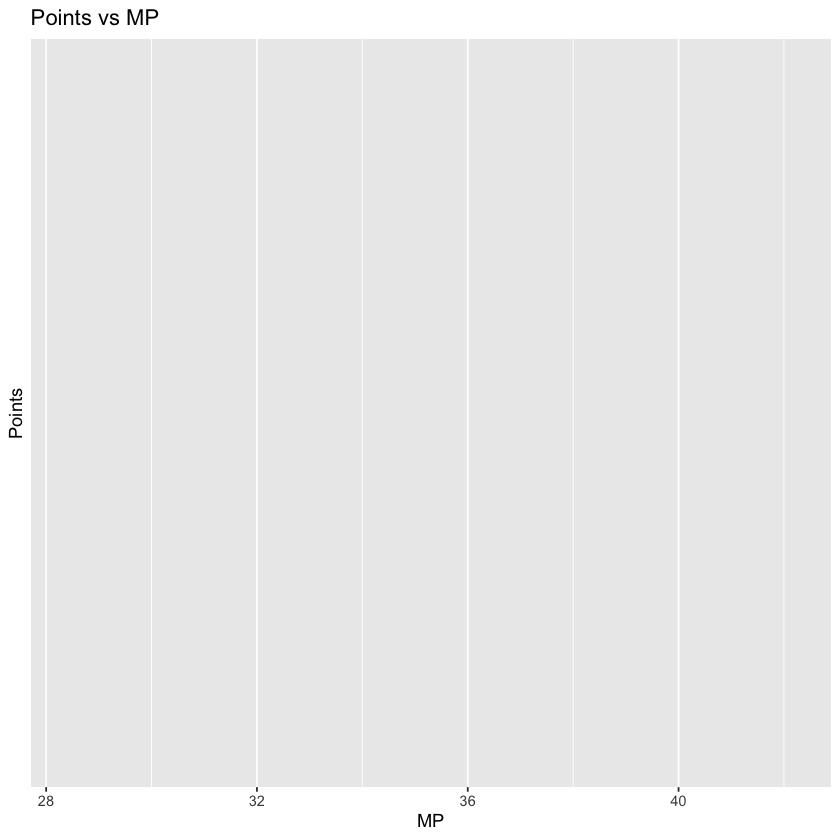

In [28]:
# Plot 4:  Relationship between Points and MP
# Observation:  Players who play around 36-38 minutes per game tend to score more points.

ggplot(data = SLS_df, 
       aes(x = MP, y = Points)) +
  geom_smooth() +
  geom_point() +
  labs(title = "Points vs MP", x = "MP", y = "Points")


# ===== THE END ==== #

In [ ]:
# If you run the .R script in RStudio, the plots will look much nicer than they do in here. 

In [ ]:
# Many thanks for the great introduction to Data Wrangling and Data Science :)